I'm using the Titanic Dataset to perform the following analysis.

In [235]:
# Import all libraries needed for the tutorial
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Enable inline plotting
%matplotlib inline

Introduction

Questions to answer based on the Titanic Dataset:

1. What is the impact of age on the survival rate? 
2. How does different fare changes people's survival rate?
3. What is the relationship between the family size and family members' survival rate?
4. What is the relationship between the number of 'SibSp' and the survival rate?
5. What is the relationship between the number of 'Parch' and the survival rate?
6. What is the impact of sex on the survival rate?
7. What is the impact of sex and Pclass on the survival rate?

print out the first few lines for each csv file

In [191]:
titanic_train = pd.read_csv('train.csv')
titanic_test = pd.read_csv('test.csv')
print titanic_train.head()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


To make the Pclass to be more descriptive, change the indicating number into corresponding Class label.

In [192]:
titanic_train['Class'] = titanic_train.Pclass.map({1 : 'First Class', 2 : 'Second Class', 3 : 'Third Class'})

In [193]:
titanic_train['Pclass']=titanic_train['Class']

In [194]:
titanic_train.Pclass.head()

0    Third Class
1    First Class
2    Third Class
3    First Class
4    Third Class
Name: Pclass, dtype: object

To make the Survived to be more descriptive, change the indicating number into corresponding surival label.

In [195]:
titanic_train['Survival']=titanic_train.Survived.map({0:'Died', 1:'Survived'})

In order to make it easier to count the number of people for each cabin, use the first letter of each cabin number
to indicate the cabin

In [196]:
titanic_train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

In [197]:
char_cabin = titanic_train['Cabin'].astype(str)
new_cabin = np.array([cabin[0] for cabin in char_cabin])
new_cabin = pd.Categorical(new_cabin)
new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [198]:
titanic_train['Cabin'] = new_cabin

In [199]:
missing_cabin = np.where(titanic_train['Cabin'] == 'n')
len(missing_cabin[0])

687

check out the data type for each remaining variable

In [200]:
titanic_train.dtypes

PassengerId       int64
Survived          int64
Pclass           object
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin          category
Embarked         object
Class            object
Survival         object
dtype: object

check out the statistical information for every variable in each csv file

In [201]:
print(titanic_train.describe())

       PassengerId    Survived         Age       SibSp       Parch        Fare
count   891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean    446.000000    0.383838   29.699118    0.523008    0.381594   32.204208
std     257.353842    0.486592   14.526497    1.102743    0.806057   49.693429
min       1.000000    0.000000    0.420000    0.000000    0.000000    0.000000
25%     223.500000    0.000000         NaN    0.000000    0.000000    7.910400
50%     446.000000    0.000000         NaN    0.000000    0.000000   14.454200
75%     668.500000    1.000000         NaN    1.000000    0.000000   31.000000
max     891.000000    1.000000   80.000000    8.000000    6.000000  512.329200


In [202]:
print(titanic_test.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000         NaN    0.000000    0.000000         NaN
50%    1100.500000    3.000000         NaN    0.000000    0.000000         NaN
75%    1204.750000    3.000000         NaN    1.000000    0.000000         NaN
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


notice that variables with type 'object' did not appear above, so we extract those variables with data type of 
'object' and print out the relative information about each variable.

In [203]:
categorical = titanic_train.dtypes[titanic_train.dtypes == 'object'].index
print (categorical)

titanic_train[categorical].describe()

Index([u'Pclass', u'Name', u'Sex', u'Ticket', u'Embarked', u'Class',
       u'Survival'],
      dtype='object')


,Pclass,Name,Sex,Ticket,Embarked,Class,Survival
count,891,891,891,891,889,891,891
unique,3,891,2,681,3,3,2
top,Third Class,"Graham, Mr. George Edward",male,CA. 2343,S,Third Class,Died
freq,491,1,577,7,644,491,549


Notice that in the train.csv, there are lots of missing values for the column 'Age', let's see how many people we
don't know about their ages

In [204]:
titanic_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%             NaN
50%             NaN
75%             NaN
max       80.000000
Name: Age, dtype: float64

In [205]:
missing = np.where(titanic_train['Age'].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [206]:
len(missing[0])

177

we are missing totally 177 person's age, now let's visualize the distribution of all the ages we have

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b5b7b50>]], dtype=object)

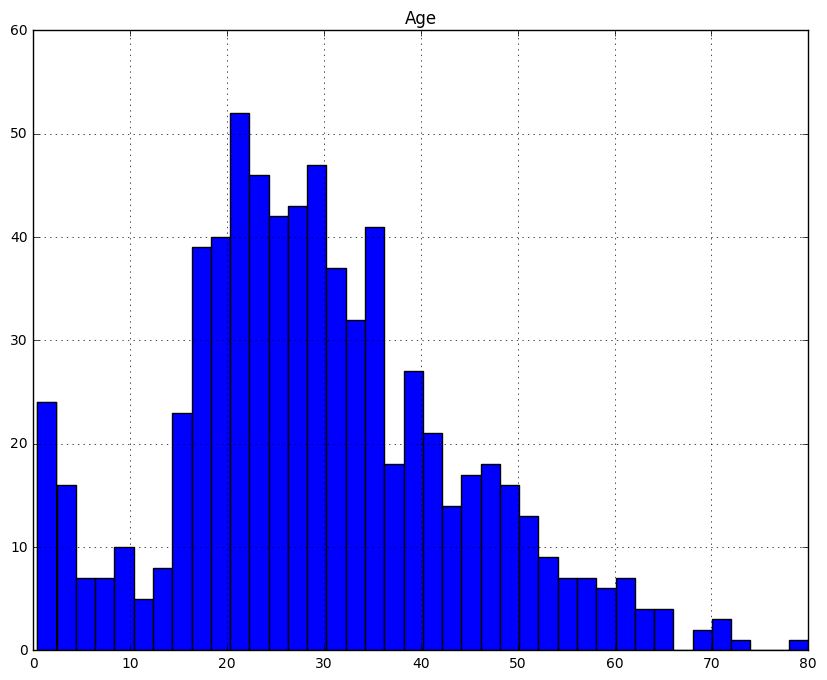

In [207]:
titanic_train.hist(column='Age',
                  figsize=(10,8),
                  bins=40)

In order to make the plot to be more comprehensive over all, we choose to use the median of ages to fill out the
remaining missing values for column 'Age'.

In [208]:
titanic_train['Age'].median()

28.0

In [209]:
titanic_train['Age'] = titanic_train['Age'].fillna(titanic_train['Age'].median())

In [210]:
titanic_train['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

Now,let's show the distribution of ages again

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ba7a790>]], dtype=object)

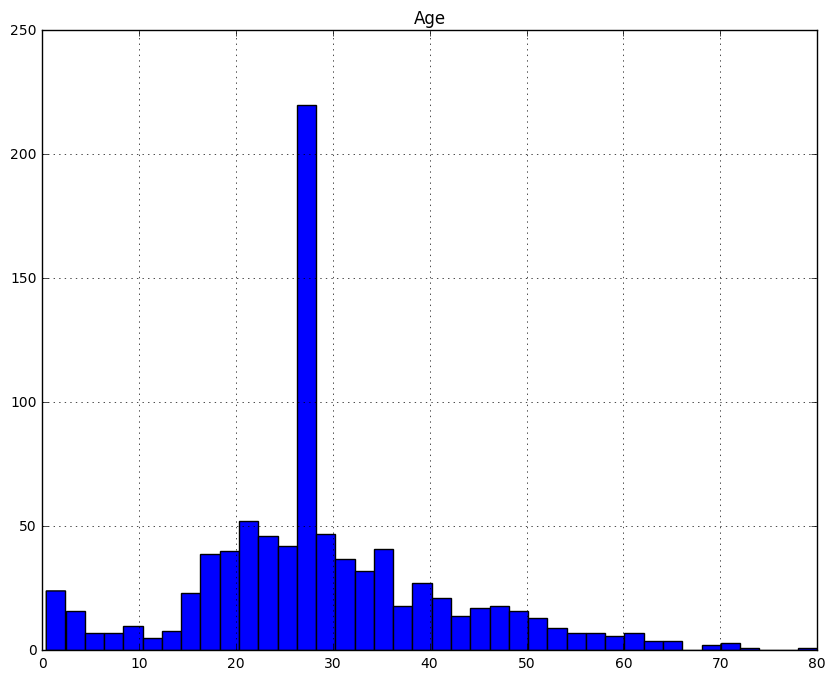

In [211]:
titanic_train.hist(column='Age',
                  figsize=(10,8),
                  bins=40)

Next, I want to explore the impact of age to the person's survival rate

In [212]:
Sex_Survived_Grouping = titanic_train.groupby(['Sex','Survival']).mean()

In [213]:
Sex_Survived_Grouping

PassengerId  Survived        Age     SibSp     Parch  \
Sex    Survival                                                         
female Died       434.851852       0.0  25.666667  1.209877  1.037037   
       Survived   429.699571       1.0  28.716738  0.515021  0.515021   
male   Died       449.121795       0.0  30.783120  0.440171  0.207265   
       Survived   475.724771       1.0  27.382294  0.385321  0.357798   

                      Fare  
Sex    Survival             
female Died      23.024385  
       Survived  51.938573  
male   Died      21.960993  
       Survived  40.821484

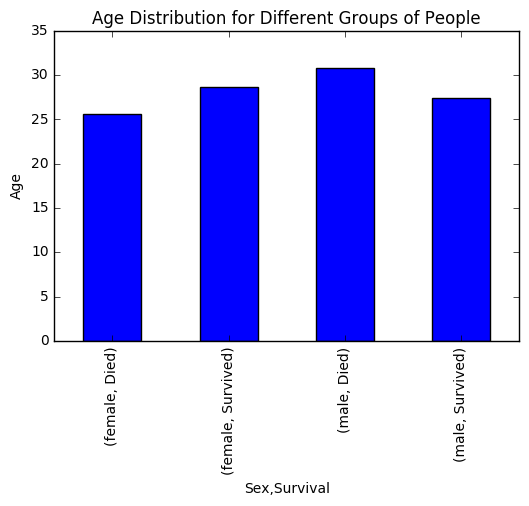

In [214]:
Sex_Survived_Grouping['Age'].plot.bar(title='Age Distribution for Different Groups of People')
plt.ylabel('Age')

From the above histogram, it's hard to say age has any impact on the survival rate. However, it's occur to me that children should have the most chances to survive, so I narrow down the age range trying to verify my idea.

          PassengerId  Survived        Age     SibSp     Parch       Fare
Age                                                                      
(0, 10]    430.843750  0.593750   4.268281  1.843750  1.421875  30.434439
(10, 20]   447.660870  0.382609  17.317391  0.591304  0.391304  29.529531
(20, 30]   431.683047  0.334152  26.544226  0.427518  0.213759  25.632952
(30, 40]   468.690323  0.445161  35.051613  0.374194  0.393548  42.496100
(40, 50]   483.500000  0.383721  45.372093  0.372093  0.430233  41.163181
(50, 60]   449.809524  0.404762  54.892857  0.309524  0.309524  44.774802
(60, 70]   430.882353  0.235294  63.882353  0.176471  0.352941  45.910782
(70, 80]   438.200000  0.200000  73.300000  0.000000  0.000000  25.936680


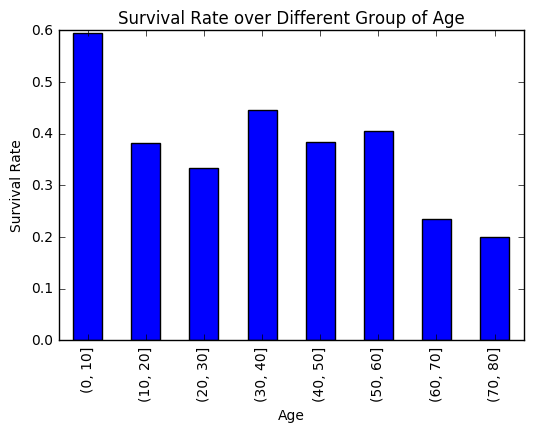

In [215]:
group_by_age = pd.cut(titanic_train['Age'], np.arange(0,90,10))
age_grouping = titanic_train.groupby(group_by_age).mean()
print age_grouping
age_grouping['Survived'].plot.bar(title='Survival Rate over Different Group of Age')
plt.ylabel('Survival Rate')

Now we can see that children under 10 years-old have the most chances to survive, which make sense in this case.

Besides the impact of age, I also want to explore the impact of fare price on people's survival rate.

First, Take a look at the detailed statistical information for the variable 'Fare'.

In [216]:
titanic_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Next, Using the box plot to show the distribution of each fair price

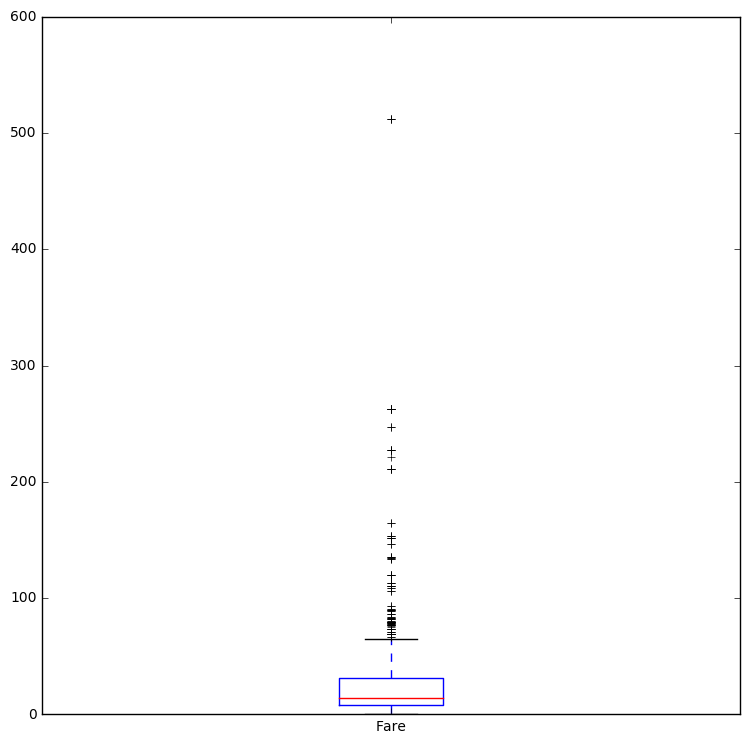

In [217]:
titanic_train['Fare'].plot(kind='box', figsize=(9,9))

From the above plot we can see that with the majority of fare price are cheap, there are still much more tickets that are very expensive.

Next, to see how does different fare changes people's survival rate, find out the information of people who paid the least and who paid the most separately.

In [218]:
index = np.where(titanic_train['Fare'] == min(titanic_train['Fare']))
print index
titanic_train.iloc[index]

(array([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
       815, 822]),)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class,Survival
179,180,0,Third Class,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,n,S,Third Class,Died
263,264,0,First Class,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B,S,First Class,Died
271,272,1,Third Class,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,n,S,Third Class,Survived
277,278,0,Second Class,"Parkes, Mr. Francis ""Frank""",male,28.0,0,0,239853,0.0,n,S,Second Class,Died
302,303,0,Third Class,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,n,S,Third Class,Died
413,414,0,Second Class,"Cunningham, Mr. Alfred Fleming",male,28.0,0,0,239853,0.0,n,S,Second Class,Died
466,467,0,Second Class,"Campbell, Mr. William",male,28.0,0,0,239853,0.0,n,S,Second Class,Died
481,482,0,Second Class,"Frost, Mr. Anthony Wood ""Archie""",male,28.0,0,0,239854,0.0,n,S,Second Class,Died
597,598,0,Third Class,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,n,S,Third Class,Died
633,634,0,First Class,"Parr, Mr. William Henry Marsh",male,28.0,0,0,112052,0.0,n,S,First Class,Died


In [219]:
index = np.where(titanic_train['Fare'] == max(titanic_train['Fare']))
print index
titanic_train.iloc[index]

(array([258, 679, 737]),)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class,Survival
258,259,1,First Class,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,n,C,First Class,Survived
679,680,1,First Class,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,First Class,Survived
737,738,1,First Class,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,First Class,Survived


it seems like people paid higher fare price tend to have a bigger chance to survive, to prove this, let's show the 
average fare paid by both survived and not survived group of people

In [220]:
fare_not_survived = titanic_train['Fare'][titanic_train['Survived'] == 0]
fare_survived = titanic_train['Fare'][titanic_train['Survived'] == 1]
avg_fare = DataFrame({'Average Fair':[fare_not_survived.mean(),fare_survived.mean()]})

In [221]:
avg_fare

,Average Fair
0,22.117887
1,48.395408


([<matplotlib.axis.XTick at 0x11c6e21d0>,
 <a list of 2 Text xticklabel objects>)

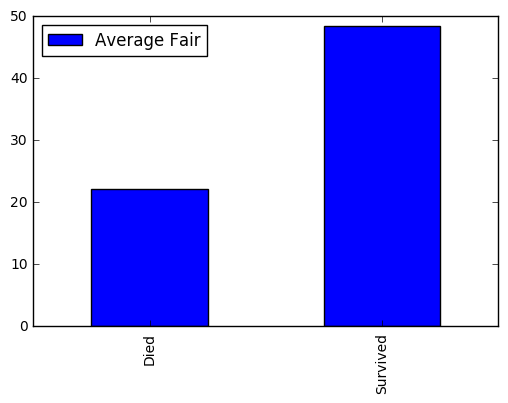

In [222]:
avg_fare.plot(kind='bar')
plt.xticks([0,1],['Died','Survived'])

From the dataframe above, we can conclude that people paid with higher fare price tend to have better chances of survive.

Now, Let's take a look at the overall distribution of the fare price

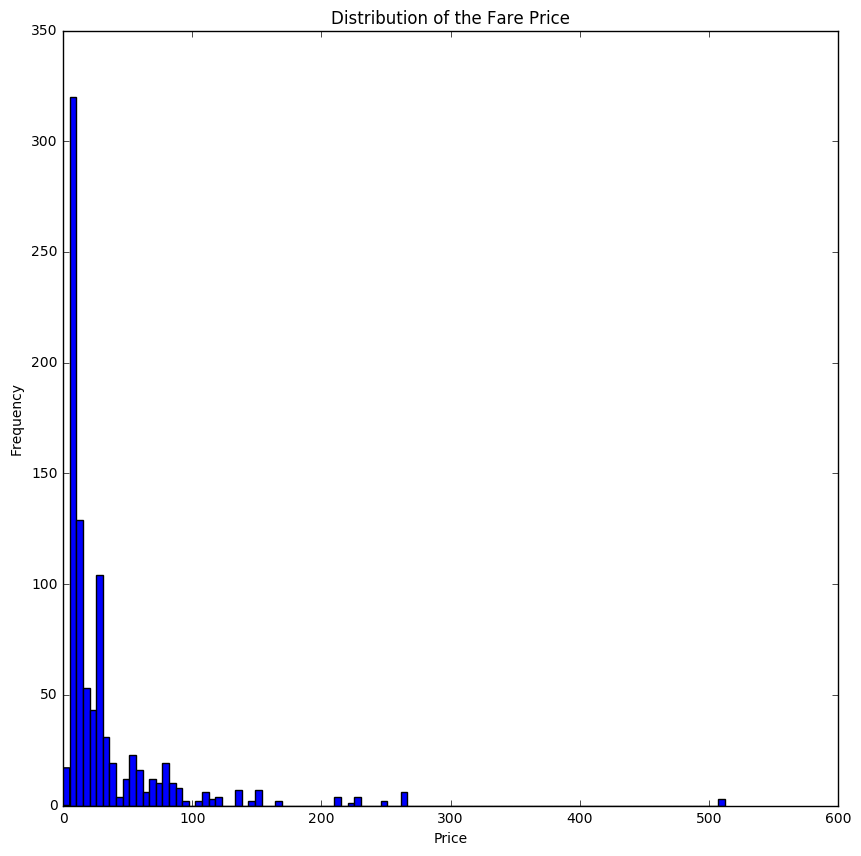

In [223]:
titanic_train['Fare'].plot.hist(bins=100,figsize=(10,10),title='Distribution of the Fare Price')
plt.xlabel('Price')

From the histogram above, we can see that most people paid with lower amount of fare price for their ticket, except
few paid with higher amount and the most expensive one is above $500.

To see more clearly about the distribution of the most paid fare price, specify the arange for the x axis, this time,
I choose (0,100)

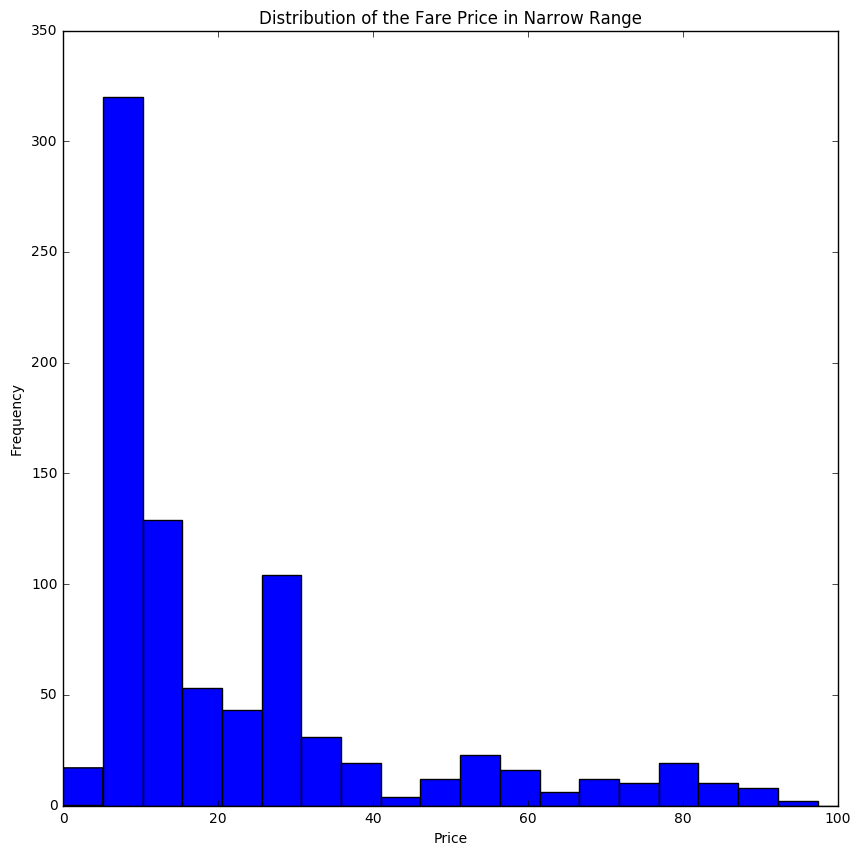

In [224]:
titanic_train['Fare'].plot.hist(bins=100,figsize=(10,10),xlim=(0,100),title='Distribution of the Fare Price in Narrow Range')
plt.xlabel('Price')

Now it's easier to see from the above histogram that more than 300 people only paid with less than $5

Next, Let's explore the relationship between the family size and family members' survival rate

First, Define the family size as the sum of 'SibSp' and 'Parch'

In [225]:
titanic_train['Family'] = titanic_train['SibSp'] + titanic_train['Parch']

Find the people with the most and the least family members

In [226]:
most_family = np.where(titanic_train['Family'] == max(titanic_train['Family']))
titanic_train.iloc[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class,Survival,Family
159,160,0,Third Class,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,n,S,Third Class,Died,10
180,181,0,Third Class,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,n,S,Third Class,Died,10
201,202,0,Third Class,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,n,S,Third Class,Died,10
324,325,0,Third Class,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,n,S,Third Class,Died,10
792,793,0,Third Class,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,n,S,Third Class,Died,10
846,847,0,Third Class,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,n,S,Third Class,Died,10
863,864,0,Third Class,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,n,S,Third Class,Died,10


In [227]:
least_family = np.where(titanic_train['Family'] == min(titanic_train['Family']))
titanic_train.iloc[least_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class,Survival,Family
2,3,1,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S,Third Class,Survived,0
4,5,0,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S,Third Class,Died,0
5,6,0,Third Class,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,n,Q,Third Class,Died,0
6,7,0,First Class,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E,S,First Class,Died,0
11,12,1,First Class,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C,S,First Class,Survived,0
12,13,0,Third Class,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,n,S,Third Class,Died,0
14,15,0,Third Class,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,n,S,Third Class,Died,0
15,16,1,Second Class,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,n,S,Second Class,Survived,0
17,18,1,Second Class,"Williams, Mr. Charles Eugene",male,28.0,0,0,244373,13.0000,n,S,Second Class,Survived,0
19,20,1,Third Class,"Masselmani, Mrs. Fatima",female,28.0,0,0,2649,7.2250,n,C,Third Class,Survived,0


Unfortunately, we find out that every family member in the largest family died in this tragedy. However, it's
hard to say that people with bigger family size tend to die in this case, since in the second plot, there are also 
lots of people died with very small family size. 

Let's narrow down the question and try to analyze the impact of 'SibSp' and 'Parch' on the corresponding survival 
rate separately

First, we can analyze the relationship between the number of 'SibSp' and the survival rate

In [228]:
SibSp_SR = DataFrame(titanic_train.groupby(['SibSp','Survival'])['PassengerId'].count())
SibSp_SR

PassengerId
SibSp Survival             
0     Died              398
      Survived          210
1     Died               97
      Survived          112
2     Died               15
      Survived           13
3     Died               12
      Survived            4
4     Died               15
      Survived            3
5     Died                5
8     Died                7

By dividing the total number of people in each SibSp group by the number of people who survived in that group,
we can get the relative probability of survive for each group of 'SibSp' and we can find out that people with more 
'SibSp' tend to have less chance to survive.

Second, we analyze the relationship between the number of 'Parch' and the survival rate

In [229]:
Parch_SR = DataFrame(titanic_train.groupby(['Parch','Survival'])['PassengerId'].count())
Parch_SR

PassengerId
Parch Survival             
0     Died              445
      Survived          233
1     Died               53
      Survived           65
2     Died               40
      Survived           40
3     Died                2
      Survived            3
4     Died                4
5     Died                4
      Survived            1
6     Died                1

We can hardly get any conclusion by aplying the same strategy as the previously one this time, there is no indication of any trend between the number of 'Parch' and the survival rate.

Next, I want to explore the impact of Sex on the survival rate

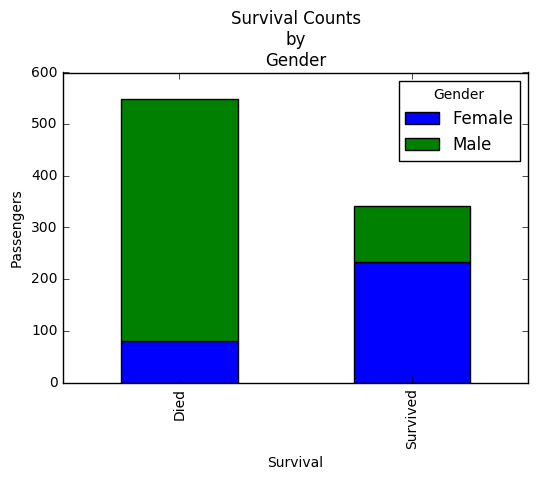

In [230]:
titanic_train['Survival']=titanic_train.Survived.map({0:'Died', 1:'Survived'})
titanic_train['Gender']=titanic_train.Sex.map({'female':'Female','male':'Male'})
titanic_train.groupby('Survival')['Gender'].value_counts().unstack().plot(kind='bar',stacked=True)
plt.ylabel('Passengers')
plt.title('Survival Counts\nby\nGender')

From the plot above, we can see that female has better chance to survive than male.

To extend this further, Let's involve both Sex and Pclass this time to analyse their impact on the survival rate.

In [231]:
Pclass_Sex_Grouping = titanic_train.groupby(['Pclass','Sex']).mean()

In [232]:
Pclass_Sex_Grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass       Sex                                                            
First Class  female   469.212766  0.968085  33.978723  0.553191  0.457447   
             male     455.729508  0.368852  38.995246  0.311475  0.278689   
Second Class female   443.105263  0.921053  28.703947  0.486842  0.605263   
             male     447.962963  0.157407  30.512315  0.342593  0.222222   
Third Class  female   399.729167  0.500000  23.572917  0.895833  0.798611   
             male     455.515850  0.135447  26.911873  0.498559  0.224784   

                           Fare    Family  
Pclass       Sex                           
First Class  female  106.125798  1.010638  
             male     67.226127  0.590164  
Second Class female   21.970121  1.092105  
             male     19.741782  0.564815  
Third Class  female   16.118810  1.694444  
             male     12.661633  0.723343

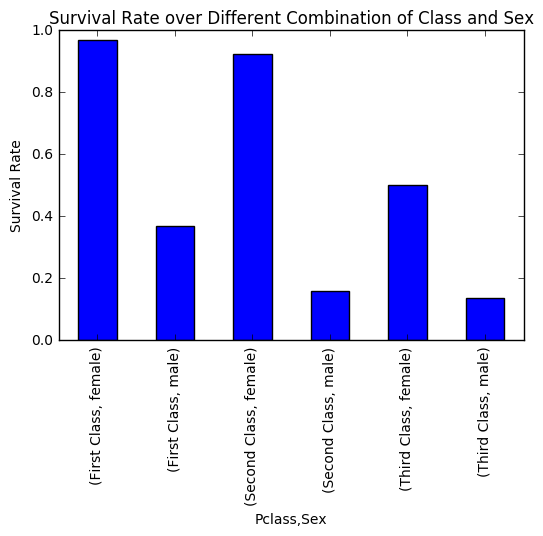

In [236]:
Pclass_Sex_Grouping['Survived'].plot.bar(title='Survival Rate over Different Combination of Class and Sex')
plt.ylabel('Survival Rate')

From the plot above, we can conclude that, within the same class, female have a better chance to survive than male;
For the same sex category, people in the higher class tend to have better chance to survive compared to lower class.

Conclusion

By analyzing the Titanic Dataset, we can now answer the questions that we have in the beginning. 
1. Children under 10 years-old have the most chances to survive.
2. People paid with higher fare price tend to have better chances of survive.
3. It's hard to say that people with bigger family size tend to die in this case, since there are also lots of people died with very small family size.
4. People with more 'SibSp' tend to have less chance to survive.
5. There is no indication of any trend between the number of 'Parch' and the survival rate.
6. Female has better chance to survive than male.
7. Within the same class, female have a better chance to survive than male; For the same sex category, people in the higher class tend to have better chance to survive compared to lower class.

Limitation of the dataset

There are few limitations with the Titanic dataset because of the following reasons:
1. Missing values
2. Other variables that could have been useful in the analysis but are not included in the dataset

Missing Values for Ages

In [234]:
len(missing[0])

177

In this case, I choose to handle the missing ages by replacing with the median age. However,while replacing the missing value by the median can make the analysis be more accurate, it also may skew the results of the analysis, so we need take caution when trying to find out how ages may change the survivability.

Missing values for the cabins:

In the dataset, there are 687 cabin information marked as missing, these information could be very helpful in determining which cabin has the most possibility to survive.

Other variables that could have been useful in the analysis but are not included in the dataset:

There may be some other variables that could be useful when analyzing the survivability, such as how many lifeboats was on the Titanic, are there enough lifeboats for everyone on the Titanic? This factor will be essential when analyzing the survivability.